#Discription:
--The model is based on the  distribution strategy and channel for a company enters in market.The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.
--Here we have to predict the total sales generated from all the sales channel. 
--This is basically a reggression problem as its target has continious values.

In [20]:
#Imoporting neccecory Libraries:

#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliars
from scipy import stats

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the Dataframe
df=pd.read_csv('Sales Channel Prediction.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape
#the shape of Dataframe is 200 rows and 5 columns

(200, 5)

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.info()
#here we can see that there is total 4 feature and 1 target column sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#here can see that ther is one unwanted column 'Unnamed: 0'.so we can delete this column from our dataset

In [6]:
#dropping the column Unnamed: 0
df=df.drop(columns='Unnamed: 0',axis=1)

In [7]:
df.isna().sum()
#As we can see there is no null present in the dataframe.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

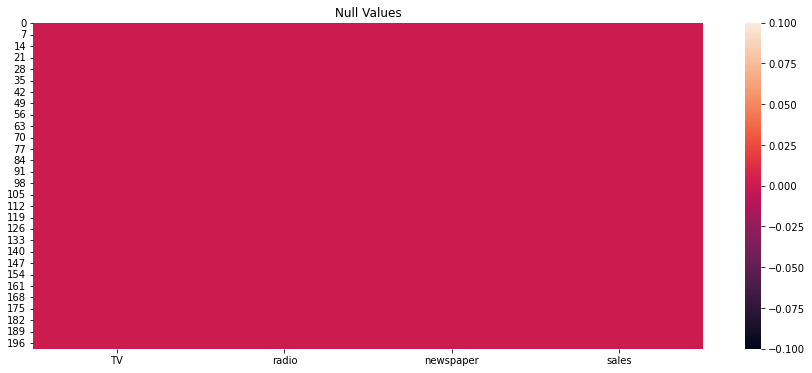

In [8]:
#ploting the heatmap to cross validate the isnull value
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [9]:
df.shape
#Now we have new rows are 200 and 4 columns

(200, 4)

In [10]:
df.describe()
#discribing the data

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#As we can check mean and median are approx same so there is very less outliers and skewness.
#the standerd daviation is looking not normal.

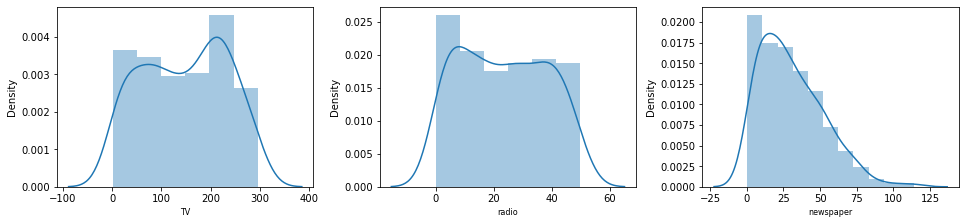

In [11]:
#Now checking the disribution of the data using distribution plot.
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:3]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#here data distribution looks normal.graph look linear.

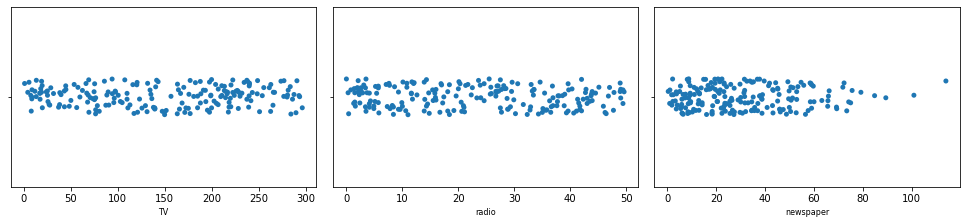

In [12]:
#Now checking the disribution of the data using distribution plot.
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:3]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.stripplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#using strip plot we can see that the data distributon looks nomal for the features.

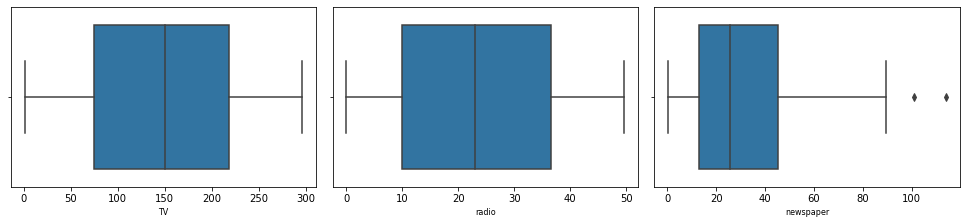

In [13]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:3]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#there is very less outliers looks in the features.so we need to delete that.we can work with that.

In [14]:
#Now checking the skewness form the data
#To check the correlation between features we can plot heat map.
corr_matrix=df.abs().corr()
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [ ]:
#we can see there is some skewness in the column TV and radio.so we will remove the skewness using the diffrent method

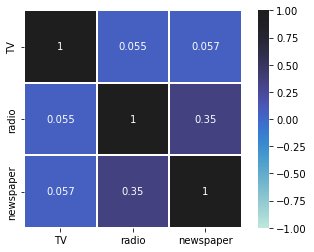

In [15]:
#Checking multicilliniary using heatmap

corr_df=df.iloc[:,:3].abs().corr()

sns.heatmap(corr_df,vmin=-1,vmax=1,center=True,square=True,annot=True,fmt='.2g',linewidths=0.1)
plt.show()

In [ ]:
#we can see that there is no multicolliniarity between the features from the heat map.

In [16]:
x=df.drop(columns='sales',axis=1)
y=df['sales']

In [17]:
x_data=x

In [25]:
#using power transform method to remove the skewness.
from sklearn.preprocessing import power_transform

In [26]:
x=power_transform(x,method='yeo-johnson')

In [27]:
#Applying the standerd scalar on the data
scalar=StandardScaler()
x_new=scalar.fit_transform(x)

In [28]:
#Using VIF to check feature multicolliniarity as we can see the high multicolliniarty between features
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['feature']=x_data.columns

In [29]:
vif

,vif,feature
0,1.003112,TV
1,1.094332,radio
2,1.093766,newspaper


In [31]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_s=r2_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
    
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)     

Best Accuracy is : 93.79%
The Best Random State is : 13


In [32]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state =13)

In [33]:
#model Evaluation for LR:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_predlr=lr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")

The accuracy of the model using LinearRegression is: 93.79%



In [34]:
#model Evaluation for KNN:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

y_predknn=knn.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")

The accuracy of the model using KNeighborsRegressor is: 94.08%



In [35]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 97.72%



In [36]:
#model Evaluation for AdaBoostRegressor:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

y_predada=ada.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")

The accuracy of the model using AdaBoostRegressor is: 94.89%



In [37]:
#model Evaluation for SVR:
svr=SVR()
svr.fit(x_train,y_train)

y_predsvr=svr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")

The accuracy of the model using SVR is: 88.09%



In [38]:
#now validation the all the models using the cross_val_score
from sklearn.model_selection import cross_val_score

In [39]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_new,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x_new,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x_new,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x_new,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x_new,y,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 97.43%


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 89.78%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 94.38%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: 95.21%


===================Cross Validation Score of SVR========================
Cross validation for the KNN Classifier is: 91.71%



In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:93.79   cross validation score:89.78  Diffrence:4.01
#KNN: Accuracy:94.08   cross validation score:94.38  Diffrence:-0.3
#RFR: Accuracy:97.72   cross validation score:94.38  Diffrence:0.29
#ABR: Accuracy:94.89   cross validation score:95.21  Diffrence:-0.32
#SVR: Accuracy:88.09   cross validation score:91.71  Diffrence:-3.62

#here we can see the overfitting and underfitting senario like:SVR,ABR and KNN show negative diffrence.means underfitting
#but we can see the Random Forest Regressor has highest accuracy and least differnece so we can select it for hyper parameter tuing.

In [ ]:
#now performing the hyper parameter tuning using gridsearchcv

In [40]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [41]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [42]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [43]:
gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 80}

In [44]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=12,min_samples_leaf=2,min_samples_split=3,n_estimators=80)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 97.76%



In [45]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_new,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 97.39%



In [ ]:
#Saving the model
import pickle
filename = 'sales_prediction_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [ ]:
#here the differnce is very less between accuracy and cross validation score after performing hyper parameter tuning.
#so we are saving Random Forest Regressor as our final model.